<h2>P1

<h3>1

Text(0.5, 1.0, 'MPG vs Horsepower')

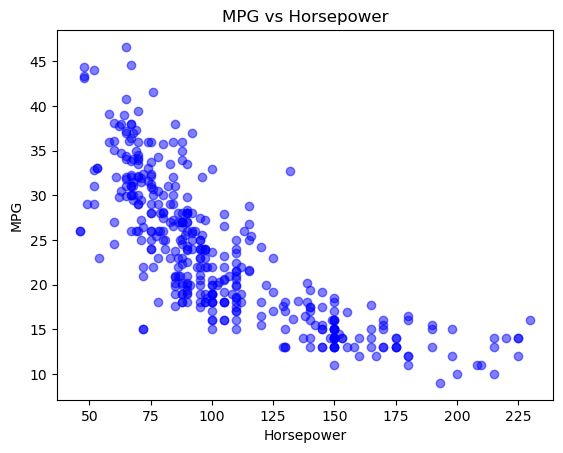

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load the Auto dataset (ensure it's in the correct path)
file_path = "Auto.csv"  # Update with the correct file path
auto = pd.read_csv(file_path, na_values="?").dropna()  # Remove missing values


# 1. Plot mpg vs. horsepower and add regression line
plt.scatter(auto["horsepower"], auto["mpg"], color="blue", alpha=0.5)
plt.xlabel("Horsepower")
plt.ylabel("MPG")
plt.title("MPG vs Horsepower")


<h3>2

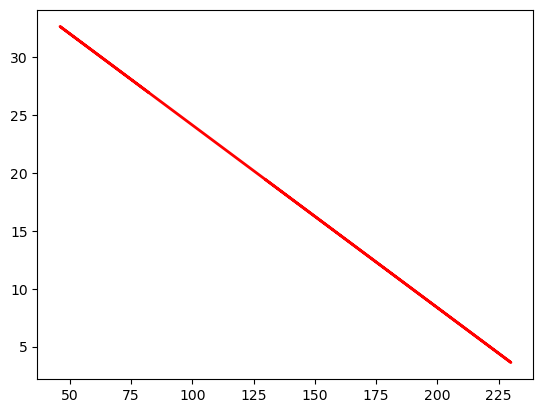

In [4]:
# 2. Perform linear regression using statsmodels
X = auto["horsepower"]
X = sm.add_constant(X)  # Add intercept term
y = auto["mpg"]
model = sm.OLS(y, X).fit()  # Fit model

# Get regression line
plt.plot(auto["horsepower"], model.predict(X), color="red", linewidth=2)
plt.show()


<h3>2a

In [5]:
# a) Is there a relationship between the predictor and the response?
p_value = model.pvalues["horsepower"]
print(f"p-value for horsepower: {p_value:.5f}")
if p_value < 0.05:
    print("Yes, there is a significant relationship.")
else:
    print("No, there is no significant relationship.")


p-value for horsepower: 0.00000
Yes, there is a significant relationship.


<h3>2b

In [6]:
# b) How strong is the relationship?
r_squared = model.rsquared
print(f"R-squared value: {r_squared:.4f}")
print("A higher R-squared value indicates a stronger relationship.")


R-squared value: 0.6059
A higher R-squared value indicates a stronger relationship.


<h3>2c

In [7]:
# c) Is the relationship positive or negative?
coef = model.params["horsepower"]
print(f"Coefficient for horsepower: {coef:.4f}")
if coef < 0:
    print("The relationship is negative.")
else:
    print("The relationship is positive.")


Coefficient for horsepower: -0.1578
The relationship is negative.


In [8]:
# d) What is the predicted mpg associated with a horsepower of 98?
predicted_mpg = model.predict([1, 98])  # [1, 98] because we added a constant (intercept)
answer_d = f"The predicted mpg for a horsepower of 98 is {predicted_mpg[0]:.2f}"